In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000533.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

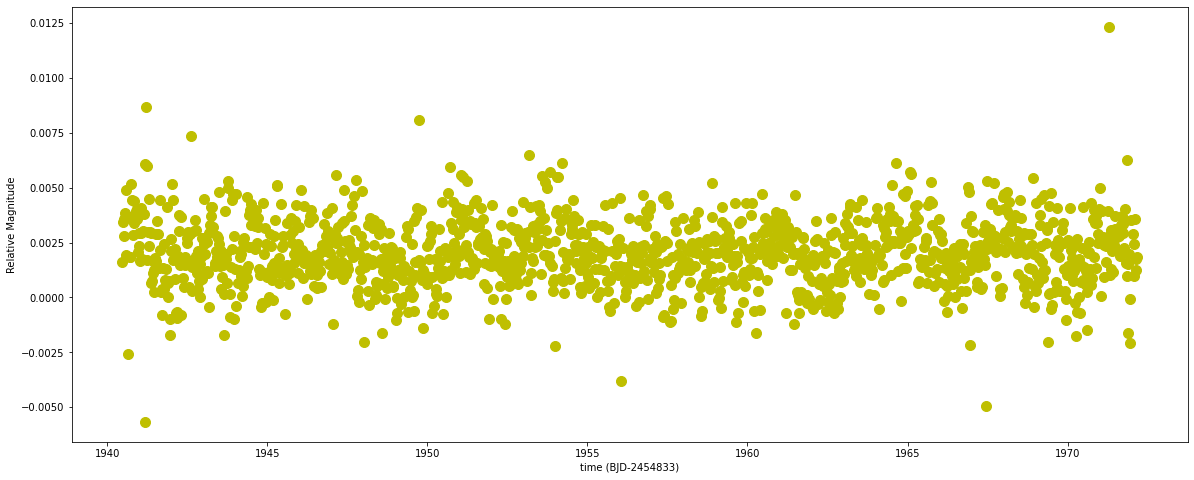

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0000533')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200815 14:33:23 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200815 14:33:23 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200815 14:33:29 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200815 14:33:29 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200815 14:33:33 nonphysical:216] spline fit done. nknots = 13,  chisq = 12341525.11390, reduced chisq = 9081.32827
[I 200815 14:33:33 png:696] plotting phased LC with period 0.414785, epoch 1970.10356
[I 200815 14:33:33 nonphysical:216] spline fit done. nknots = 13,  chisq = 12727337.65001, reduced chisq = 9365.22270
[I 200815 14:33:33 png:696] plotting phased LC with period 0.207392, epoch 1944.62524
[I 200815 14:33:34 nonphysical:216] spline fit done. nknots = 13,  chisq = 12580498.82395, reduced chisq = 9257.17353
[I 200815 14:33:34 png:696] plotting phased LC with period 0.829570, epoch 1940.47762
[I 200815 14:33:34 nonphysical:216] spline fit done. nknots = 13,  chisq = 12588049.46572, reduced chisq = 9262.72956
[I 200815 14:33:34 png:696] plotting phased LC with period 0.118068, epoch 1940.47762
[I 200815 14:33:34 nonphysical:216] spline fit done. nknots = 13,  chisq = 12635816.18736, reduced chisq = 9297.87799
[I 200815 14:33:34 png:696] plotting phased LC with period 0.30706

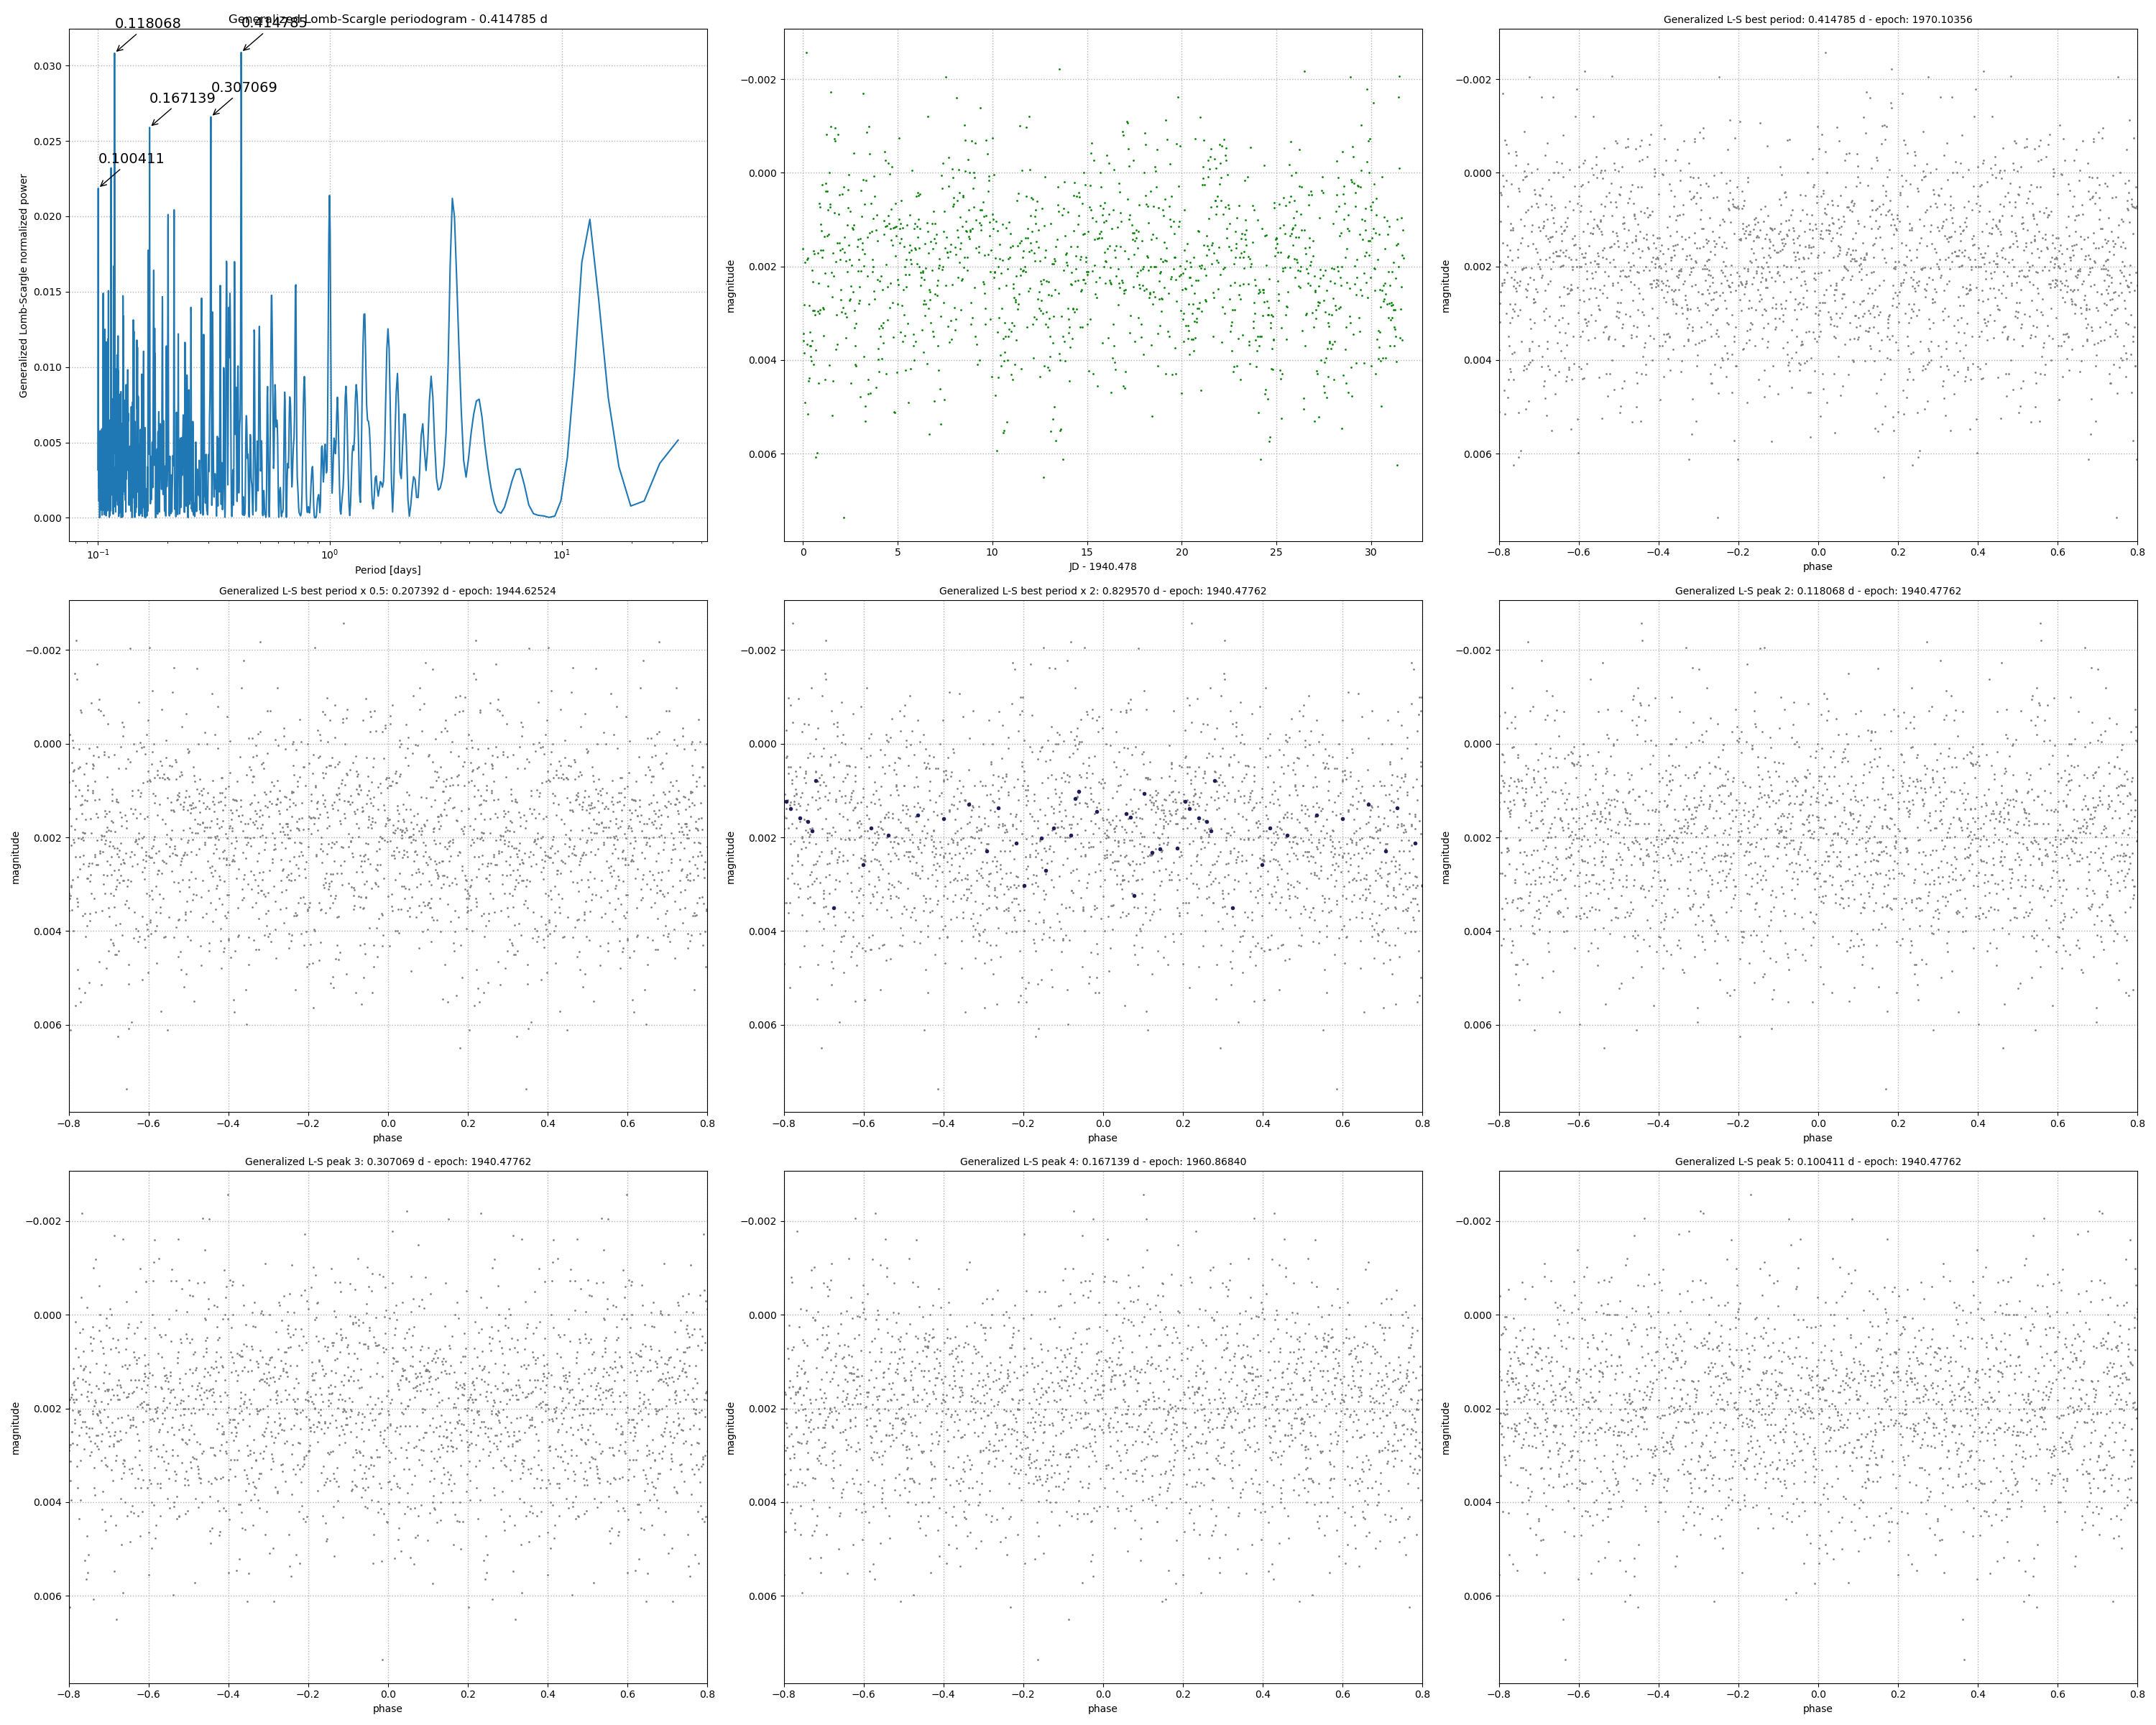

In [8]:
from IPython.display import Image
Image('0000533-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.4147847794502608,
 'bestlspval': 0.030875885236750805,
 'nbestpeaks': 5,
 'nbestlspvals': [0.030875885236750805,
  0.03082577559301727,
  0.02659840544566803,
  0.025898819895277078,
  0.021862165714317275],
 'nbestperiods': [0.4147847794502608,
  0.11806839474664652,
  0.3070693522286815,
  0.167139014504219,
  0.10041051061470191],
 'lspvals': array([0.00515605, 0.00361262, 0.00111957, ..., 0.00411209, 0.00344811,
        0.00318507]),
 'omegas': array([ 0.19827305,  0.23792767,  0.27758228, ..., 62.7335946 ,
        62.77324921, 62.81290382]),
 'periods': array([31.68955715, 26.40796429, 22.63539796, ...,  0.10015663,
         0.10009336,  0.10003017]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.4147847794502608, 0.11806839474664652, 0.3070693522286815, 0.167139014504219, 0.10041051061470191] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200815 14:33:43 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200815 14:33:43 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889034195607261e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200815 14:33:43 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200815 14:33:43 abls:969] new minfreq: 0.06311227356485809, maxfreq: 10.0
[I 200815 14:33:43 abls:980] using 6 workers...
[I 200815 14:33:43 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200815 14:33:43 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200815 14:33:43 abls:1090] worker 3: minfreq = 3.393074, nfreqs = 21105
[I 200815 14:33:43 abls:1090] worker 4: minfreq = 5.058054, nfreqs = 21105
[I 200815 14:33:43 abls:1090] worker 5: minfreq = 6.723035, nfreqs = 21105
[I 200815 14:33:43 abls:1090] worker 6: minfreq = 8.388016, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200815 14:34:13 png:1142] no best period found for this object, skipping...


In [13]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200815 14:34:17 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200815 14:34:17 spdm:349] using 6 workers...


In [14]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200815 14:34:21 nonphysical:216] spline fit done. nknots = 13,  chisq = 12682858.47260, reduced chisq = 9339.36559
[I 200815 14:34:21 png:696] plotting phased LC with period 31.689557, epoch 1940.47762
[I 200815 14:34:21 nonphysical:216] spline fit done. nknots = 13,  chisq = 12852011.26912, reduced chisq = 9463.92582
[I 200815 14:34:21 png:696] plotting phased LC with period 15.844779, epoch 1956.29170
[I 200815 14:34:21 nonphysical:216] spline fit done. nknots = 13,  chisq = 12707095.04761, reduced chisq = 9350.32748
[I 200815 14:34:21 png:696] plotting phased LC with period 63.379114, epoch 1940.47762
[I 200815 14:34:21 nonphysical:216] spline fit done. nknots = 13,  chisq = 12665256.78486, reduced chisq = 9319.54142
[I 200815 14:34:21 png:696] plotting phased LC with period 3.371229, epoch 1940.47762
[I 200815 14:34:21 nonphysical:216] spline fit done. nknots = 13,  chisq = 12551917.02401, reduced chisq = 9236.14203
[I 200815 14:34:21 png:696] plotting phased LC with period 26.4

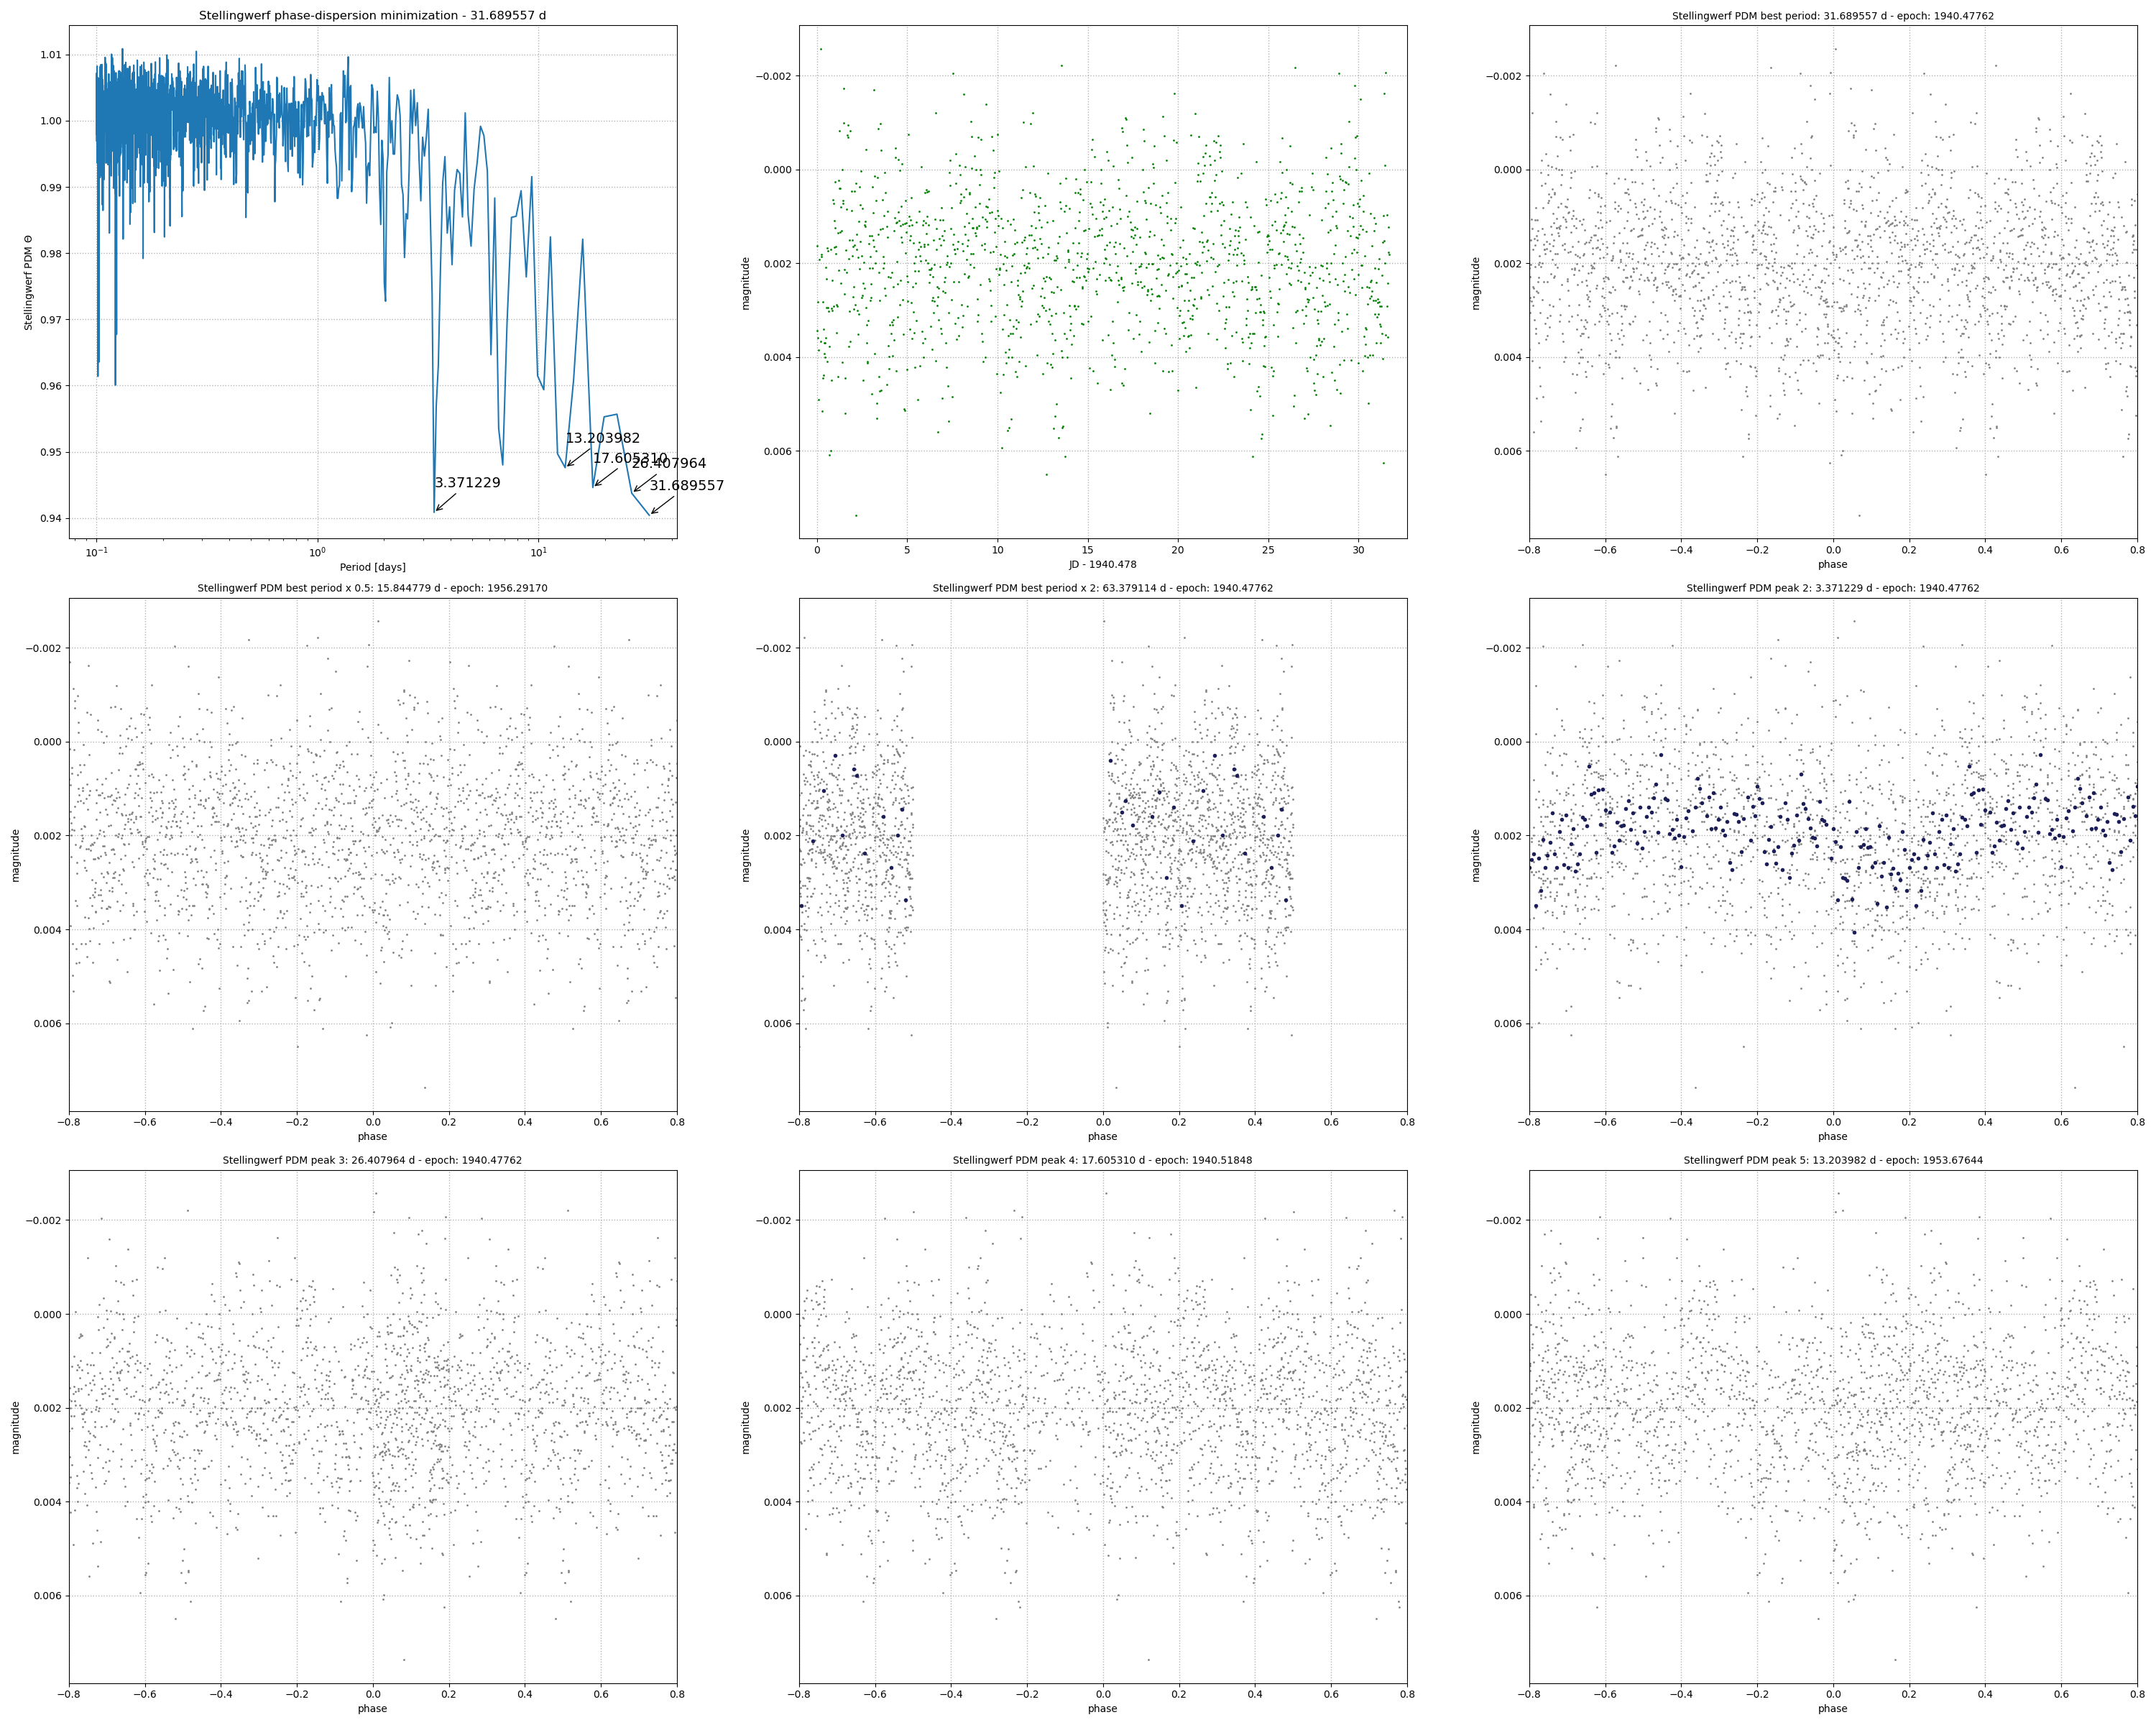

In [15]:
Image('0000533-checkplot-spdm.png')

In [16]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [31.689557149999928, 3.3712294840425456, 26.407964291666605, 17.605309527777738, 13.203982145833303] (days)
